In [1]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import sklearn.tree as tree
import copy
from sklearn.utils import resample
import numpy as numpy
import matplotlib.pyplot as pyplot
import math as math
import pydotplus
import pydot
from sklearn import tree
from IPython.display import Image 
import functions as func
from scipy import stats
import os


def show_uncertainty_for_sample(s): 
    """Calculates uncertainty of prediction of given sample by showing number of samples in leaf,
    RMSE of leaf and histogram of labels in leaf

    Parameters
    ----------
    s : numpy.ndarray
        Feature array of sample
    """
    leaf_id = dt.apply(s)
    leaves = dt.apply(train_X)
    sample_ids = numpy.where(leaves==leaf_id)
    sample_values = train_y.iloc[sample_ids]
    sample_impurity = numpy.sqrt(dt.tree_.impurity[leaf_id])
    print("Anzahl an Traingsdaten: ", len(sample_ids[0]))
    print("Vorhersage: %.2f +/- %.2f"%(dt.predict(s),sample_impurity))
    pyplot.hist(sample_values,bins=[90,110, 120,140, 160,180, 190,210, 220,240, 260,280, 
                                 290,310, 320,340, 360,380, 390,410, 490,510], rwidth=1.0)
    pyplot.show()
    
    
def calculate_bootstrap_confidence_interval(s, confidence=0.95, n_iterations=100):
    """Calculates bootstrapped confidence interval for prediction of given sample. 
    Shows histogram of bootstrapped values for better interpretation.

    Parameters
    ----------
    s : numpy.ndarray
        Feature array of sample
    confidence : float, optional
        An indicator of confidence level (default 0.95)
    confidence : int, optional
        Number of bootstrap iterations (default 100)
    
    """
    n_size = int(len(data_raw) * 0.70)

    predictions = list()
    for i in range(n_iterations):
        # prepare train and test sets
        train = resample(data_raw, n_samples=n_size)
        test = numpy.array([x for x in data_raw if x.tolist() not in train.tolist()])
        # fit model
        model = DecisionTreeRegressor()
        model.fit(train[:,:-1], train[:,-1])
        # evaluate model
        prediction = model.predict(s)
        predictions.append(prediction)

    pyplot.hist(predictions)
    pyplot.show()
    # confidence intervals
    p = ((1.0-confidence)/2.0) * 100
    lower = max(0.0, numpy.percentile(predictions, p))
    p = (confidence+((1.0-confidence)/2.0)) * 100
    upper = min(500.0, numpy.percentile(predictions, p))
    print("mittlere Vorhersage: %.1f"%(numpy.mean(predictions)))
    print('%.1f Konfidenzintervall zwischen %.1f und %.1f' % (confidence*100, lower, upper))


In [2]:
#Change these as desired, if LABEL != "Prog1_scaled" then other3 has to be "Prog1_scaled"
LABEL = "MfI1_beste"
other1 = "Prog1_beste"
other2 = "beste"
other3 = "Prog1_scaled"

In [3]:
data_raw,_,y,train_X,test_X,train_y,test_y,names,feature_names,numcols,numrows = func.load_data_noten(LABEL, other1, other2, other3)

(array([ 7.,  0.,  3.,  0.,  3.,  0.,  6.,  0.,  3.,  0., 12.,  0.,  6.,
         0., 11.,  0., 12.,  0., 12.,  0., 49.]),
 array([ 90, 110, 120, 140, 160, 180, 190, 210, 220, 240, 260, 280, 290,
        310, 320, 340, 360, 380, 390, 410, 490, 510]),
 <a list of 21 Patch objects>)

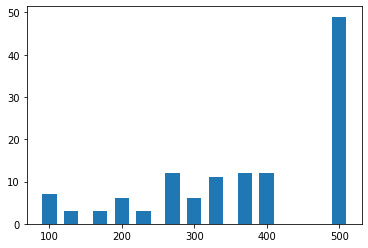

In [4]:
pyplot.hist(data_raw["%s"%(LABEL)], bins=[90,110, 120,140, 160,180, 190,210, 220,240, 260,280, 
                                 290,310, 320,340, 360,380, 390,410, 490,510], rwidth=1.0)
#pyplot.savefig('../Arbeit/pics/notenverteilung_%s.png'%(LABEL))

In [5]:
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
dt.fit(train_X, train_y)
dt.predict(test_X.to_numpy()[0].reshape(1, -1))
data_raw = data_raw.to_numpy()

In [6]:
os.makedirs(os.path.dirname("graphs/dot/dt_regressor_conf.dot"), exist_ok = True)
tree.export_graphviz(dt, out_file='graphs/dot/dt_regressor_conf.dot', feature_names= train_X.columns,
                     filled=True, rounded=True,special_characters=True)

!dot -T png graphs/dot/dt_regressor_conf.dot -o graphs/dt_regressor_conf.png

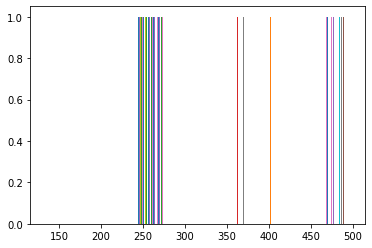

mittlere Vorhersage: 326.0
90.0 Konfidenzintervall zwischen 270.0 und 500.0
Anzahl an Traingsdaten:  19
Vorhersage: 355.26 +/- 87.56


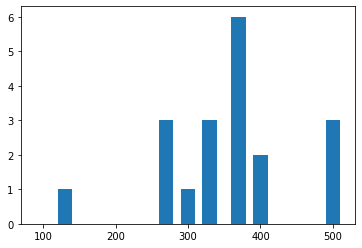

In [7]:
idx = 4
calculate_bootstrap_confidence_interval(test_X.to_numpy()[idx].reshape(1, -1), confidence=0.9)
show_uncertainty_for_sample(test_X.to_numpy()[idx].reshape(1, -1))

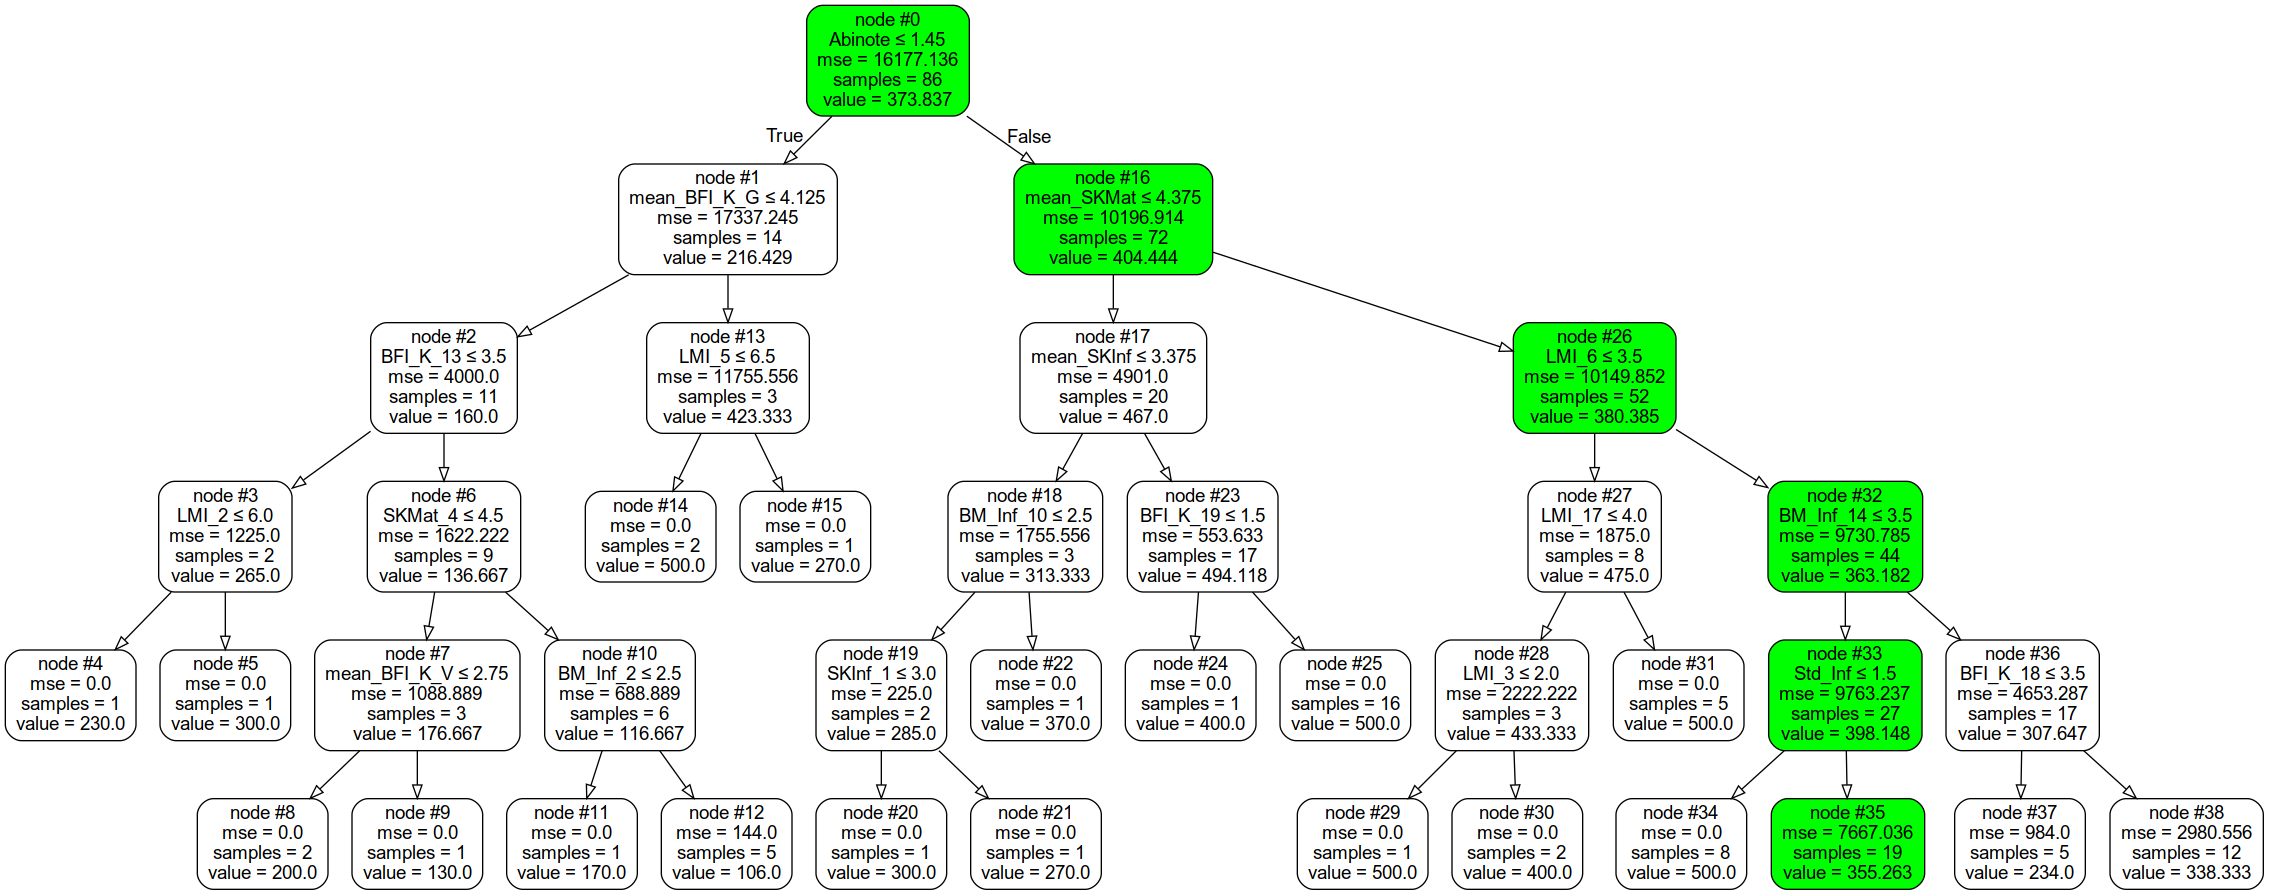

In [8]:
graph = func.plot_decision_path(dt,test_X.to_numpy()[idx].reshape(1, -1), train_X)
Image(graph.create_png())